<a href="https://colab.research.google.com/github/adityapawarx/707-lecture-master/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Exercise 1

Create a DataFrame by reading in the `2019_Yellow_Taxi_Trip_Data.csv` file. Examine the first 5 rows.

In [215]:
import pandas as pd
df = pd.read_csv("/2019_Yellow_Taxi_Trip_Data.csv")
df.head()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2,2019-10-23T16:39:42.000,2019-10-23T17:14:10.000,1,7.93,1,N,138,170,1,29.5,1.0,0.5,7.98,6.12,0.3,47.90,2.5
1,1,2019-10-23T16:32:08.000,2019-10-23T16:45:26.000,1,2.00,1,N,11,26,1,10.5,1.0,0.5,0.00,0.00,0.3,12.30,0.0
2,2,2019-10-23T16:08:44.000,2019-10-23T16:21:11.000,1,1.36,1,N,163,162,1,9.5,1.0,0.5,2.00,0.00,0.3,15.80,2.5
3,2,2019-10-23T16:22:44.000,2019-10-23T16:43:26.000,1,1.00,1,N,170,163,1,13.0,1.0,0.5,4.32,0.00,0.3,21.62,2.5
4,2,2019-10-23T16:45:11.000,2019-10-23T16:58:49.000,1,1.96,1,N,163,236,1,10.5,1.0,0.5,0.50,0.00,0.3,15.30,2.5


### Exercise 2

Find the dimensions (number of rows and number of columns) in the data.

##### We use .shape function to find the shape of the dataframe. The dataframe has 100000 rows and 18 columns

In [216]:
df.shape

(10000, 18)

#### Exercise 3

Calculate summary statistics for the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` columns.

###### We use the decribe() function to get the statistical summary of the dataframe. It gives out the count, mean, std, min, 25%, 50%, 75% and the max amount of each column.

In [217]:
summary_statistics_of_the_specified_columns = df[['fare_amount', 'tip_amount', 'tolls_amount', 'total_amount']].describe()
print(summary_statistics_of_the_specified_columns)


        fare_amount    tip_amount  tolls_amount  total_amount
count  10000.000000  10000.000000  10000.000000  10000.000000
mean      15.106313      2.634494      0.623447     22.564659
std       13.954762      3.409800      6.437507     19.209255
min      -52.000000      0.000000     -6.120000    -65.920000
25%        7.000000      0.000000      0.000000     12.375000
50%       10.000000      2.000000      0.000000     16.300000
75%       16.000000      3.250000      0.000000     22.880000
max      176.000000     43.000000    612.000000    671.800000


#### Exercise 4

Count the number of NAs in each column.

##### There are no NANs in out Dataframe

In [218]:
number_of_nans = df.isna().sum()
number_of_nans

vendorid                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
ratecodeid               0
store_and_fwd_flag       0
pulocationid             0
dolocationid             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
dtype: int64

#### Exercise 5

Read the `2019_Yellow_Taxi_Trip_Data.csv` into Pandas. Use a scatter plot matrix (in pandas) to visualize continuous data columns.  That is, drop columns that appear to be ids. Do not visualize date columns.

###### First we select the required attributes that we want to plot. Below we have passsed a list under the variable named "attributes" followed by the pandas's function scatter_matrix and plot it using matplotlib library.

In [219]:
attributes = df[["passenger_count", "trip_distance","fare_amount", "extra",
                 "tip_amount", "tolls_amount","mta_tax","improvement_surcharge",
                "total_amount","congestion_surcharge"]]

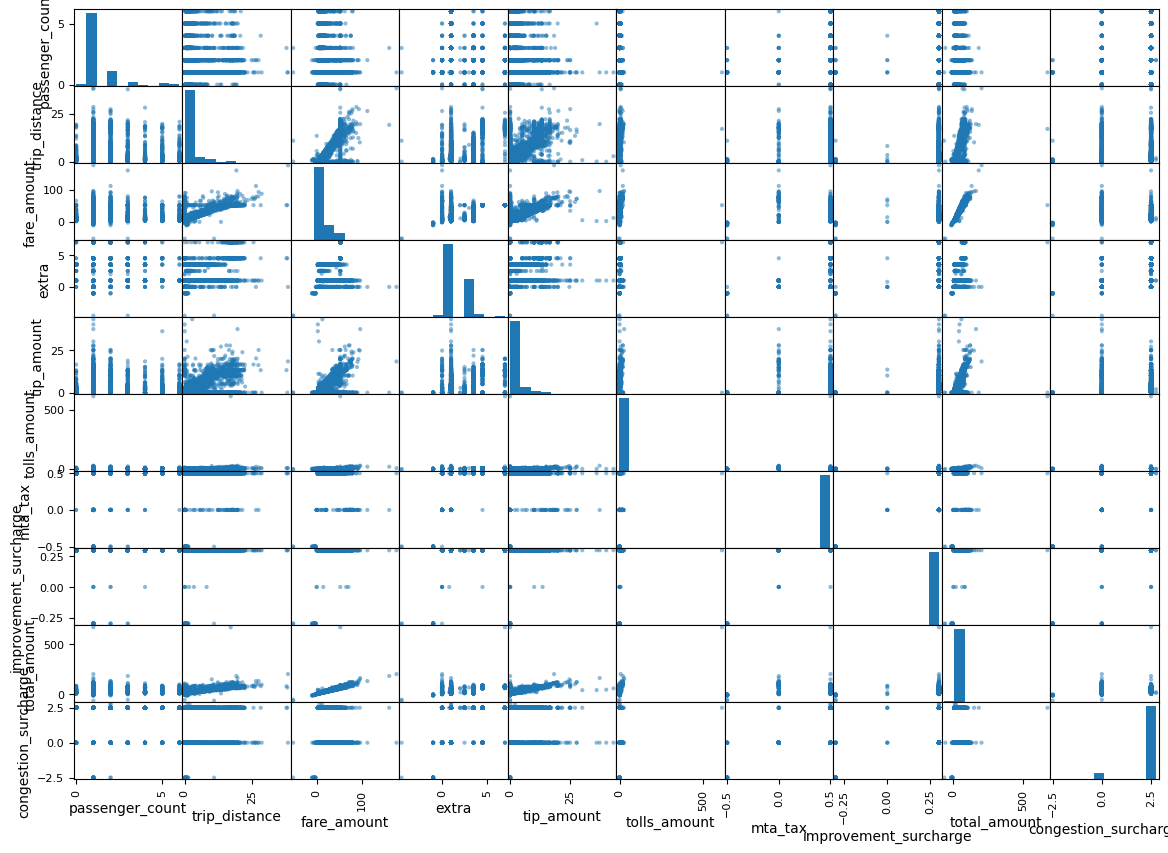

In [220]:
from pandas.plotting import scatter_matrix
scatterplot = scatter_matrix(attributes,figsize=(14,10))
import matplotlib.pyplot as plt
plt.show()

#### Exercise 6

Examine the distribution of just the `total_amount` column.  Are there outliers? How can you tell?

###### I have plotted a boxplot. Boxplot are the best for spotting outliers as they show the data's quartiles and any points that lie out of the 1.5X times the IQE.
###### We can see the that there is an outlier at the top where the total_amount value is 700. This might mean that the distance travelled is a lot or some one was generous enough to give a hugh tip.
###### Upon checking the details in the dataframe, the exact value is 671.8, the tip is 0 and the distance is average nothing extraordinary, so we can count this as an anomaly.

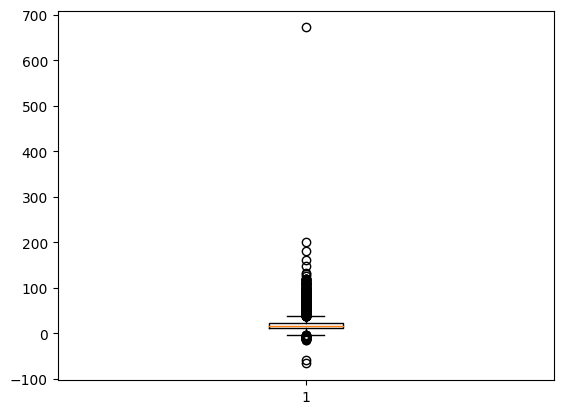

In [221]:
plt.boxplot(df["total_amount"])
plt.show()

#### Exercise 7

Use a LinearRegression classifier and a simple train / test split, find a subset of features that best predict the `fare_amount`.  Do not use `total_amount` or `tip_amount` as features.

In [222]:
df=df
df.shape

(10000, 18)

#### SPLITTING THE DATA INTO TRAINING AND TESTING DATASETS WHILE SEPARATING THE TARGET VALUES

In [223]:
y = df[['fare_amount']]
X = df[[ 'passenger_count', 'trip_distance','payment_type', 'extra', 'mta_tax',
              'tolls_amount', 'improvement_surcharge', 'congestion_surcharge']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [224]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 8)
(2000, 8)
(8000, 1)
(2000, 1)


##### Tried scaling but was getting an error

In [225]:
'''#SCALING

X_train_column_names = X.columns
X_test_column_names = X.columns

from sklearn .preprocessing import MinMaxScaler

#Scaling X_train
min_max_scaler = MinMaxScaler(feature_range=(-1,1))
X_train_scaled_array  = min_max_scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled_array, columns=X_train_column_names)
X_train_scaled.head(3)

#Scaling X_test
min_max_scaler = MinMaxScaler(feature_range=(-1,1))
X_test_scaled_array  = min_max_scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled_array, columns = X_test_column_names)
X_test_scaled.head(3)

#Print shape for final check
print(X_test_scaled.shape)
print(X_train_scaled.shape)'''

'#SCALING\n\nX_train_column_names = X.columns \nX_test_column_names = X.columns\n\nfrom sklearn .preprocessing import MinMaxScaler\n\n#Scaling X_train\nmin_max_scaler = MinMaxScaler(feature_range=(-1,1))\nX_train_scaled_array  = min_max_scaler.fit_transform(X_train)\nX_train_scaled = pd.DataFrame(X_train_scaled_array, columns=X_train_column_names)\nX_train_scaled.head(3)\n\n#Scaling X_test\nmin_max_scaler = MinMaxScaler(feature_range=(-1,1))\nX_test_scaled_array  = min_max_scaler.fit_transform(X_test)\nX_test_scaled = pd.DataFrame(X_test_scaled_array, columns = X_test_column_names)\nX_test_scaled.head(3)\n\n#Print shape for final check\nprint(X_test_scaled.shape)\nprint(X_train_scaled.shape)'

###### Fit the model for it to study the data

In [226]:
#Fit the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [227]:
#Predict and evaluation
predictions = model.predict(X_test)
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, predictions, squared=False)
rmse

6.472247603863693

In [228]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, predictions)
r_squared

0.7716183600298828

#### Exercise 8

Do the same thing you did in 7, but use a decision tree classifier.  Which works better? Why do you think that is?


In [229]:
from sklearn.tree import DecisionTreeRegressor
model2 = DecisionTreeRegressor()
model2.fit(X_train, y_train)

predictions2 = model2.predict(X_test)
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, predictions2, squared=False)
print(rmse)

from sklearn.metrics import r2_score
r_squared = r2_score(y_test, predictions2)
print(r_squared)

5.279360195573331
0.8480455133212322


#### CONCLUSION: The DecisionTreeRegressor model performed better than LinearRegression method. This is beause the DecisionTreeRegressor is not linear model, hence it can capture the non-linear relations as well. It can also capture the interation between the features. There was one outlier that we did not remove, DecisionTreeRegressor models are not much affected by outliers where as LinearRegression models are.